# Анализ эффективности удержания
В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:
* state — штат США
* account_length — длительность использования аккаунта
* area_code — деление пользователей на псевдорегионы, использующееся в телекоме
* intl_plan — подключена ли у пользователя услуга международного общения
* vmail_plan — подключена ли у пользователя услуга голосовых сообщений
* vmail_message — количество голосых сообщений, который пользователь отправил / принял
* day_calls — сколько пользователь совершил дневных звонков
* day_mins — сколько пользователь проговорил минут в течение дня
* day_charge — сколько пользователь заплатил за свою дневную активность
* eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
* night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
* intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
* custserv_calls — сколько раз пользователь позвонил в службу поддержки
* treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
* mes_estim — оценка интенсивности пользования интернет мессенджерами
* churn — результат оттока: перестал ли абонент пользоваться услугами оператора

Задание:
1. Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Какой критерий подходит для решения этой задачи? Сколько достигаемых уровней значимости оказались меньше, чем α=0.05?
2. Посчитайте корреляции Пирсона и Спирмена между day_calls и mes_estim на всех данных, оцените их значимость, дайте интерпретацию результата.
3. Посчитайте значение коэффицента корреляции Крамера между штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Проверьте гипотезу об отсутствии связи между этими признаками.
4. Проведите анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1). Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 100)

In [2]:
def read_data(path):
    data = pd.read_csv(path, index_col=0)
    binary_features = ['intl_plan', 'vmail_plan', 'churn']
    binary_mapper = {'yes': 1, 'True.': 1, 'no': 0, 'False.': 0}
    for f in binary_features:
        data[f] = data[f].map(binary_mapper)
    return data

df = read_data('churn_analysis.csv')
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0.65,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.55,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.72,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0.28,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,2,0.45,0


In [3]:
pd.DataFrame(df.groupby('state').agg({
    'churn': ['mean', 'sum','count']})).sort_values(by=('churn','mean'), ascending=False)

churn          
           mean sum count
state                    
NJ     0.264706  18    68
CA     0.264706   9    34
TX     0.250000  18    72
MD     0.242857  17    70
SC     0.233333  14    60
MI     0.219178  16    73
MS     0.215385  14    65
NV     0.212121  14    66
WA     0.212121  14    66
ME     0.209677  13    62
MT     0.205882  14    68
AR     0.200000  11    55
KS     0.185714  13    70
NY     0.180723  15    83
MN     0.178571  15    84
PA     0.177778   8    45
MA     0.169231  11    65
CT     0.162162  12    74
NC     0.161765  11    68
NH     0.160714   9    56
GA     0.148148   8    54
DE     0.147541   9    61
OK     0.147541   9    61
OR     0.141026  11    78
UT     0.138889  10    72
CO     0.136364   9    66
KY     0.135593   8    59
SD     0.133333   8    60
OH     0.128205  10    78
FL     0.126984   8    63
IN     0.126761   9    71
ID     0.123288   9    73
WY     0.116883   9    77
MO     0.111111   7    63
VT     0.109589   8    73
AL     0.100000   8    80
NM     0.096774   6    62
ND     0.096774   6    62
WV     0.094340  10   106
TN     0.094340   5    53
DC     0.092593   5    54
RI     0.092308   6    65
WI     0.089744   7    78
IL     0.086207   5    58
NE     0.081967   5    61
LA     0.078431   4    51
IA     0.068182   3    44
VA     0.064935   5    77
AZ     0.062500   4    64
AK     0.057692   3    52
HI     0.056604   3    53

# Задание 1
Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Какой критерий подходит для решения этой задачи? Сколько достигаемых уровней значимости оказались меньше, чем α=0.05

**Для данной задачи лучше всего подходит точный критерий Фишера. Подробнее про него [здесь](https://github.com/artemuk/churn-analysis/blob/master/lectures/3.pdf).**

In [4]:
t1 = df[df.treatment == 1]
t1_cs = pd.crosstab(t1.state, t1.churn)

In [5]:
t1_cs.head()

churn,0,1
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5


In [6]:
from scipy.stats import fisher_exact
from itertools import combinations

In [7]:
def fisher_test(table, alternative='two-sided'):
    pairs = [list(c) for c in combinations(table.index, 2)]
    p_values = [fisher_exact(table.loc[c])[1] for c in pairs]
    return np.array(p_values), pairs

In [8]:
state_p_values, state_pairs = fisher_test(t1_cs)

In [9]:
states = pd.DataFrame({'states': state_pairs, 'p-value': state_p_values})
for i, (s1, s2) in enumerate(states.states):
    states.loc[i, 'state1'] = df[df.state == s1].churn.mean()
    states.loc[i, 'state2'] = df[df.state == s2].churn.mean()
states['diff'] = np.abs(states['state1'] - states['state2'])
states.sort_values(by='p-value', inplace=True)

In [10]:
states.head()

,p-value,states,state1,state2,diff
771,0.026963,"[LA, TX]",0.078431,0.250000,0.171569
775,0.029057,"[LA, WA]",0.078431,0.212121,0.133690
747,0.030730,"[LA, MA]",0.078431,0.169231,0.090799
681,0.032840,"[KS, LA]",0.185714,0.078431,0.107283
749,0.035768,"[LA, ME]",0.078431,0.209677,0.131246


## Не учитываем поправку на множественную проверку гипотез

In [11]:
alpha = 0.05

In [12]:
nmt_states = states[states['p-value'] < alpha]
nmt_states.index = range(len(nmt_states))
nmt_states

,p-value,states,state1,state2,diff
0,0.026963,"[LA, TX]",0.078431,0.250000,0.171569
1,0.029057,"[LA, WA]",0.078431,0.212121,0.133690
2,0.030730,"[LA, MA]",0.078431,0.169231,0.090799
3,0.032840,"[KS, LA]",0.185714,0.078431,0.107283
4,0.035768,"[LA, ME]",0.078431,0.209677,0.131246
5,0.035772,"[CA, NM]",0.264706,0.096774,0.167932
6,0.041122,"[ME, NM]",0.209677,0.096774,0.112903
7,0.042146,"[CA, LA]",0.264706,0.078431,0.186275
8,0.043382,"[AR, LA]",0.200000,0.078431,0.121569
9,0.049676,"[NM, TX]",0.096774,0.250000,0.153226


Мы нашли 10 пар штатов, для которых доля ушедших абонентов статистически значимо отличается.

Интересно, что в 7 случаях присутствует штат LA.

## Теперь учтём поправку на множественную проверку гипотез

In [13]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [14]:
holm_rejected, p_holm, _, _ = multipletests(state_p_values, alpha=alpha, method='holm')
fdr_bh_rejected, p_fdr_bh, _, _ = multipletests(state_p_values, alpha=alpha, method='fdr_bh')
mt_states = pd.DataFrame({'states': state_pairs, 'p-values': state_p_values, 
                          'p_holm': p_holm, 'p_fdr_bh': p_fdr_bh,
                          'rejected': np.logical_or(holm_rejected, fdr_bh_rejected)
                         }).sort_values(by='rejected', ascending=False)

In [15]:
# p_holm - p-value при использовании метода Холма
# p_fdr_bh - p-value при использовании метода Бенджамини-Хохберга
# rejected - Была ли отвергнута нулевая гипотеза  хотябы одним из методов
mt_states.head()

,p-values,p_fdr_bh,p_holm,rejected,states
0,0.381063,1.0,1.0,False,"[AK, AL]"
847,0.190296,1.0,1.0,False,"[ME, NE]"
854,0.457671,1.0,1.0,False,"[ME, OK]"
853,0.085544,1.0,1.0,False,"[ME, OH]"
852,0.374605,1.0,1.0,False,"[ME, NY]"


Как видно из таблички (значения в ней отсортированы по убыванию признака rejected, который равен true, если нулевая гипотеза для этой пары штатов отвергается хотябы одной из поправок) любая из поправок на множественную проверку не позволяет отвергнуть нулевую гипотезу ни для одной пары штатов. Учитывая это, можно сделать сделать вывод, что штат не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Про множественную проверку гипотез читаем [здесь](https://github.com/artemuk/churn-analysis/blob/master/lectures/3-3.Mnozhestvennaya_proverka_gipotez.pdf). Очень советую прочитать там же про реальные примеры действия эффекта множественной проверки гипотез при поиске экстрасенсов (пункт 9.1.1), анализе данных МРТ (9.1.2) и анализе подгрупп (9.6).

# Задание 2
Посчитайте корреляции Пирсона и Спирмена между day_calls и mes_estim на всех данных, оцените их значимость, дайте интерпретацию результата.

In [16]:
from scipy.stats import pearsonr, spearmanr, probplot

In [17]:
# Функции pearsonr и spearmanr считают соответствующие коэффиценты корреляции, а также
# считают p-value для нулевых гипотез о равенстве этих коэффицентов нулю (т.е. проверяют
# статистическую значимость этих коэффицентов)
pearson_r, pearson_p = pearsonr(df.day_calls, df.mes_estim)
spearman_r, spearman_p = spearmanr(df.day_calls, df.mes_estim)
print("Pearson correlation: %f, p value: %f" % (pearson_r, pearson_p))
print("Spearman correlation: %f, p value: %f" % (spearman_r, spearman_p))

Pearson correlation: -0.051794, p value: 0.002780
Spearman correlation: 0.043350, p value: 0.012317


В обоих случаях нулевая гипотеза об отсутствии корреляции отвергается на уровне доверия 0.05.

Интересно, что в случае корреляции Пирсона наблюдается (очень) слабая отрицательная связь, в то время как в случае корреляции Спирмена - (очень) слабая положительная связь.

Посмотрим, что приводит к таким протеворечивым результатам.

## Проверим имеют ли признаки day_calls и mes_estim нормальное распределение

Построим гистограммы распределений этих признаков и QQ-графики. Про QQ-графики и проверку на нормальность читаем [тут](https://github.com/artemuk/churn-analysis/blob/master/lectures/2-2.Parametricheskie_kriterii.pdf) (пункт 5.4)

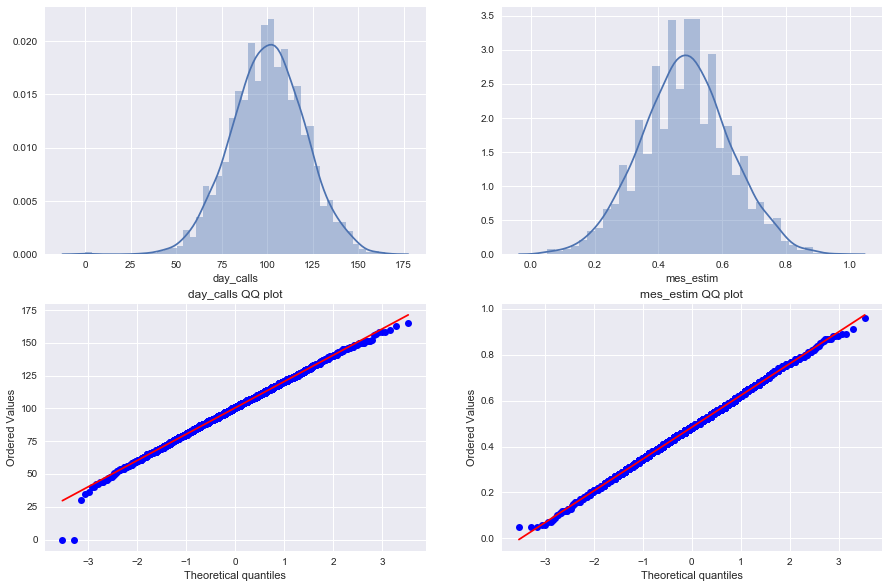

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(df.day_calls)

plt.subplot(223)
probplot(df.day_calls, dist='norm', plot=plt)
plt.title('day_calls QQ plot')

plt.subplot(222)
sns.distplot(df.mes_estim)

plt.subplot(224)
probplot(df.mes_estim, dist='norm', plot=plt)
plt.title('mes_estim QQ plot')

### Критерий Шапиро-Уилка

In [19]:
from scipy.stats import shapiro

In [20]:
_, day_calls_p = shapiro(df.day_calls)
_, mes_estim_p = shapiro(df.mes_estim)
print("day_calls p-value: %f" % day_calls_p)
print("mes_estim p-value: %f" % mes_estim_p)

day_calls p-value: 0.000277
mes_estim p-value: 0.077516


Судя по гистограммам, QQ plot-ам и критерию Шапиро-Уилка признак day_calls действительно распределён нормально, а признак mes_estim имеет распределение близкое к нормальному. Таким образом распределение выборок не должно вызывать такие аномалии.

### Взглянем на scatter plot

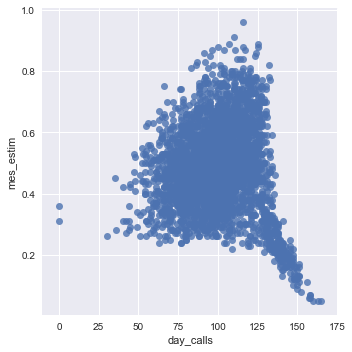

In [21]:
sns.lmplot(data=df, x='day_calls', y='mes_estim', fit_reg=False)

На scatter plot-е ясно видно, что для части наших данных характерна сильная отрицательная корреляция, а для другой - слабая положительная. Это и привело к различным знакам коэффицентов корреляции Пирсона и Спирмена.

Pearson correlation: 0.174813, p value: 0.000000
Spearman correlation: 0.180899, p value: 0.000000


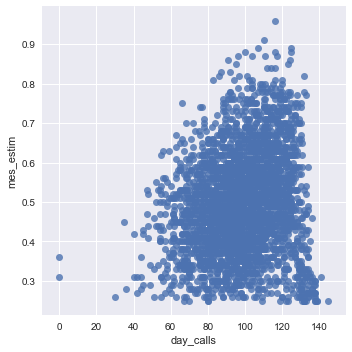

In [22]:
mask = (df.mes_estim > 0.24)
print("Pearson correlation: %f, p value: %f" % pearsonr(df.day_calls[mask], df.mes_estim[mask]))
print("Spearman correlation: %f, p value: %f" % spearmanr(df.day_calls[mask], df.mes_estim[mask]))
sns.lmplot(data=df[mask], x='day_calls', y='mes_estim', fit_reg=False)

Pearson correlation: -0.784357, p value: 0.000000
Spearman correlation: -0.783870, p value: 0.000000


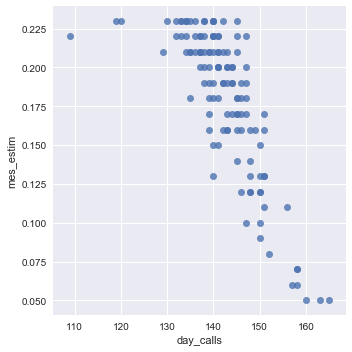

In [23]:
mask = (df.mes_estim < 0.24)
print("Pearson correlation: %f, p value: %f" % pearsonr(df.day_calls[mask], df.mes_estim[mask]))
print("Spearman correlation: %f, p value: %f" % spearmanr(df.day_calls[mask], df.mes_estim[mask]))
sns.lmplot(data=df[mask], x='day_calls', y='mes_estim', fit_reg=False)

Про корреляции Пирсона, Спирмена и их значимость читаем [здесь](https://github.com/artemuk/churn-analysis/blob/master/lectures/3-2.Korrelyacii.pdf). Очень советую прочитать про "Булщит и консервативность" (пункт 8.5) и "Корреляция и причинно-следственная связь" (8.6)

# Задание 3
Посчитайте значение коэффицента корреляции Крамера между штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Проверьте гипотезу об отсутствии связи между этими признаками.

In [24]:
from scipy.stats import chi2_contingency

def cramersV(contingency_table):
    r, c = contingency_table.sum(axis=1), contingency_table.sum(axis=0)
    n = contingency_table.sum().sum()
    chi2, p, _, exp_freq = chi2_contingency(contingency_table, correction=False)
    corr = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    return corr, p, exp_freq

In [25]:
cramerv_r, cramerv_p, exp_freq = cramersV(t1_cs)
print("Cramer's V: %f, p value: %f" % (cramerv_r, cramerv_p))
print("Cells with expected cell count >= 5: %f" % (exp_freq >= 5).mean())

Cramer's V: 0.200393, p value: 0.709759
Cells with expected cell count >= 5: 0.519608


Про коэффицент Крамера и почему его здесь нельзя применять читаем в пункте 8.4.3

# Задание 4
Проведите анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1). Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

In [26]:
t0 = df[df.treatment == 0]
t2 = df[df.treatment == 2]

In [27]:
pd.DataFrame({'control group': t1.churn.mean(), 'treatment 0': t0.churn.mean(),
              'treatment 2': t2.churn.mean()}, index=['churn rate'])

,control group,treatment 0,treatment 2
churn rate,0.164084,0.145631,0.125113


Видим что есть различия долей оттока в контрольной и тестовых группах. Проверим, являются ли эти различия значимыми 

## Z-критерий для разности долей в независимых выборках

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$
Нулевая гипотеза: Доля оттока в первой выборке совпадает с долей оттока для второй.

Проверять будем против двусторонней альтернативы, т.к. мы точно не уверены, что стратегии удержания действительно уменьшают отток.

Вот кстати интересная история, связанная с использованием односторонних альтернатив вместо двусторонних, которая упоминалась в курсе:

>На второй неделе мы говорили об АБ-тестах, позволяющих с помощью небольших и недорогих экспериментов оптимизировать продукт, чтобы, например, заработать на нём больше денег. Вот [здесь](http://bit.ly/28Jdg4n) можно почитать, как с помощью АБ-тестов, сделанных с помощью продукта компании Optimizely, EA Games на 43% повысила долю покупок игры SimCity 5. Можно ли доверять этим оценкам?

>[История о том, как с помощью АА-тестов в продукте Optimizely были выявлены нарушения базовых статистических предположений](http://blog.sumall.com/journal/optimizely-got-me-fired.html), из-за которых оценки эффекта были завышенными. Был скандал!"

Про АБ-тесты можно прочитать [здесь](https://github.com/artemuk/churn-analysis/blob/master/lectures/2-1.Vvedenye_v_AB_testy.pdf)

In [28]:
import scipy

In [29]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [30]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [31]:
def proportions_diff_z_test(sample1, sample2, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    z_stat = proportions_diff_z_stat_ind(sample1, sample2)
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [32]:
# Сравниваем контрольную группу и treatment0
proportions_diff_z_test(t1.churn, t0.churn)

0.22833116390451069

In [33]:
# Сравниваем контрольную группу и treatment2
# Видим, что p-value значительно ниже порога 0.05
proportions_diff_z_test(t1.churn, t2.churn)

0.0093480842944511089

In [34]:
# Сравниваем treatment0 и treatment2
proportions_diff_z_test(t0.churn, t2.churn)

0.15642468860508019

In [35]:
# Доверительный интервал (95%) для разницы долей оттока в контрольной группе и treatment2
proportions_diff_confint_ind(t1.churn, t2.churn)

(0.0096187667380921195, 0.068322308856685027)

### Критерий $\chi ^{2}$ (хи-квадрат)

In [36]:
t_cs = pd.crosstab(df.treatment, df.churn)
t_cs

churn,0,1
treatment,,
0,968,165
1,917,180
2,965,138


In [37]:
# Сравниваем контрольную группу и treatment0
chi2_contingency(t_cs.loc[[1,0]], correction=False)[1]

0.22833116390451058

In [38]:
# Сравниваем контрольную группу и treatment2
# Видим, что p-value значительно ниже порога 0.05
chi2_contingency(t_cs.loc[[1,2]], correction=False)[1]

0.0093480842944510881

In [39]:
# Сравниваем treatment0 и treatment2
chi2_contingency(t_cs.loc[[0,2]], correction=False)[1]

0.15642468860507983

### Критерий Фишера

In [40]:
pd.crosstab(df.treatment, df.churn)

churn,0,1
treatment,,
0,968,165
1,917,180
2,965,138


In [41]:
p_value_ft, treatments_ft = fisher_test(pd.crosstab(df.treatment, df.churn))
for p, t in zip(p_value_ft, treatments_ft):
    print("treatment %i vs treatment %i: " % tuple(t), p)

treatment 0 vs treatment 1:  0.241587339358
treatment 0 vs treatment 2:  0.173935660449
treatment 1 vs treatment 2:  0.0108003638995


Все три критерия дают один и тот же результат:

* Доля в контрольной группе **не отличается** от доли в группе treatment 0
* Доля в контрольной группе **отличается** от доли в группе treatment 2
* Доля в группе treatment 0 **не отличается** от доли в группе treatment 2

Исходя из него можно сделать вывод, что вторая стратегия удержания действительно работает.

В тоже время про первую сказать что-то довольно затрудинтельно.

Кстати, в последнем эксперементе формально надо делать поправку на множественную проверку гипотез, т.к. мы одновременно проверяем три гипотезы. В данном случае мы легко можем применить поправку Бонферрони, идея которой заключается в том, чтобы умножить получившиеся уровни значимости на количество проверяемых гипотез и только после этого сравнивать их с порогом $\alpha$. Применяя её результаты нашего эксперемента не изменятся.

Следует отметить, что эта поправка чересчур консервативная и вместо неё ВСЕДА лучше использовать другие поправки.

# Building classifier (TODO)

## Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [ ]:
def prepare_data(data, drop_features, cat_features):
    y = data['churn'].astype(bool)
    X = data.drop(drop_features + ['churn'], axis=1)
    X = pd.get_dummies(X, columns=cat_features)
    return train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
drop_features = ['state' ,
                 'day_charge', 'eve_charge', 'night_charge', 'intl_charge',
                 'area_code', 
                 'vmail_plan']
cat_features = ['treatment']

X_train, X_val, y_train, y_val = prepare_data(df, drop_features, cat_features)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

In [ ]:
X_train['custserv_calls >= 4'] = X_train.custserv_calls >= 4
X_val['custserv_calls >= 4'] = X_val.custserv_calls >= 4

In [ ]:
X_train.shape

In [ ]:
lr = LogisticRegressionCV(penalty='l2', class_weight='balanced', Cs=20,
                          scoring='roc_auc', n_jobs=-1)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
print("Train: %f" % roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1:]))
print("CV: %f" % lr.scores_[True][0].mean())
print("Test: %f" % roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1:]))

In [ ]:
pd.DataFrame(lr.coef_[0], index=X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
drop_features = ['day_charge', 'eve_charge', 'night_charge', 'intl_charge']

In [ ]:
X_train, X_val, y_train, y_val = prepare_data(df, drop_features,
                                              cat_features=['treatment', 'state'])

In [ ]:
X_train, X_val, y_train, y_val = prepare_data(df, drop_features + ['state'],
                                              cat_features=['treatment'])

In [ ]:
param_grid = {'max_depth': range(1,11), 'max_features': range(4,X_train.shape[1])}
gs = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, scoring='roc_auc')

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
print("Best params: %s" % gs.best_params_)
print("Train: %f" % roc_auc_score(y_train, gs.best_estimator_.predict_proba(X_train)[:, 1:]))
print("CV: %f" % gs.best_score_)
print("Test: %f" % roc_auc_score(y_val, gs.best_estimator_.predict_proba(X_val)[:, 1:]))

In [ ]:
# pd.DataFrame(gs.cv_results_)
gs.cv_results_['std_test_score'].mean()

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
print("Train: %f" % roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1:]))
print("Test: %f" % roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1:]))

In [ ]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display

In [ ]:
export_graphviz(dt, feature_names=X_train.columns, out_file='tree.dot',
                filled=True, label='root')
!dot -Tpng 'tree.dot' -o 'tree.png'

In [ ]:
display(Image('tree.png', unconfined=True))

In [ ]:
y_train[(X_train.day_mins <= 264.55) & (X_train.intl_plan == 1) & (X_train.custserv_calls > 3.5)].mean()

## Boosting

In [ ]:
import lightgbm

In [ ]:
n_estimators = [1, 10, 100, 1000]

In [ ]:
lgb_res = pd.DataFrame()

for n in n_estimators:
    lgb = lightgbm.LGBMClassifier(n_estimators=n)
    lgb.fit(X_train, y_train)
    lgb_res.loc[n, 'train'] = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1:])
    lgb_res.loc[n, 'test'] = roc_auc_score(y_val, lgb.predict_proba(X_val)[:, 1:])

In [ ]:
lgb_res